## Table Of Contents

## Introduction

- Phase 1 Summary


- Report Overview


- Overview of Methodology 

Data Prepaation for Training 

In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Set Seaborn's style
sns.set_style("whitegrid")
###

In [39]:
import pandas as pd

# URL of the modified CSV file on GitHub
url = 'https://raw.githubusercontent.com/serapheon98/ML1-RMIT/test/modified_mumbai.csv'

# Read the CSV file into a DataFrame named "modified_mumbai"
mumbai = pd.read_csv(url)

# Display the head of the DataFrame
mumbai.head(10)


,house_type,house_size,location,latitude,longitude,price,numBathrooms,SecurityDeposit,Status
0,4 BHK Apartment,"3,750 sq ft",Bandra West,19.061588,72.827354,700000,4.0,No Deposit,Semi-Furnished
1,3 BHK Apartment,"1,450 sq ft",Powai,19.115047,72.912346,140000,3.0,No Deposit,Furnished
2,1 BHK Apartment,650 sq ft,Mira Road East,19.293390,72.865402,24000,2.0,No Deposit,Semi-Furnished
3,2 BHK Independent House,"1,300 sq ft",Kalyan West,21.232368,81.616531,14000,2.0,No Deposit,Semi-Furnished
4,2 BHK Apartment,"1,050 sq ft",Malabar Hill,18.958900,72.809975,120000,2.0,No Deposit,Semi-Furnished
5,1 BHK Apartment,600 sq ft,Bandra West,19.061171,72.831627,55000,2.0,No Deposit,Furnished
6,2 BHK Apartment,"1,350 sq ft",Cumballa Hill,18.970388,72.804276,110000,2.0,No Deposit,Furnished
7,2 BHK Apartment,"1,150 sq ft",Seawoods,19.012964,73.022446,52000,2.0,No Deposit,Furnished
8,2 BHK Apartment,900 sq ft,Thane West,19.216753,72.993729,30000,2.0,No Deposit,Semi-Furnished
9,3 BHK Apartment,"1,450 sq ft",Juhu,19.108797,72.829079,150000,3.0,No Deposit,Semi-Furnished


## Checking for Missing values

In [40]:
# Checking for any other missing values across all columns
print(mumbai.isnull().sum())

house_type         0
house_size         0
location           0
latitude           0
longitude          0
price              0
numBathrooms       0
SecurityDeposit    0
Status             0
dtype: int64


## Summary of the Dataset

In [41]:
print("Statistical Summary of Numerical Variables")
print(mumbai.describe())

Statistical Summary of Numerical Variables
          latitude    longitude         price  numBathrooms
count  5000.000000  5000.000000  5.000000e+03   5000.000000
mean     19.159138    72.953226  6.239421e+04      2.028200
std       0.435495     0.564369  8.874473e+04      0.806929
min      17.468220    72.719688  2.800000e+03      0.000000
25%      19.070265    72.839161  2.100000e+04      2.000000
50%      19.128770    72.884460  4.000000e+04      2.000000
75%      19.195199    72.995323  7.000000e+04      2.000000
max      30.888254    91.792137  1.200000e+06      7.000000


## One hot encoding

- Encoding of the target variable that is 'Price'

In [42]:
# Print the counts of observations with 'price' > 60000 and < 60000
print("Number of observations with price < 60000:", (mumbai['price'] < 60000).sum())
print("Number of observations with price > 60000:", (mumbai['price'] > 60000).sum())

Number of observations with price < 60000: 3359
Number of observations with price > 60000: 1512


In [43]:
# Replace the 'price' column with a new 'target' column
target = mumbai[['price']]
target['price'] = (target['price'] > 60000).astype(int)

# Drop the 'price' column from the 'mumbai' DataFrame
mumbai.drop('price', axis=1, inplace=True)

# Display the updated DataFrame to verify the changes
print(mumbai.head())


                 house_type   house_size        location   latitude  \
0          4 BHK Apartment   3,750 sq ft     Bandra West  19.061588   
1          3 BHK Apartment   1,450 sq ft           Powai  19.115047   
2          1 BHK Apartment     650 sq ft  Mira Road East  19.293390   
3  2 BHK Independent House   1,300 sq ft     Kalyan West  21.232368   
4          2 BHK Apartment   1,050 sq ft    Malabar Hill  18.958900   

   longitude  numBathrooms SecurityDeposit          Status  
0  72.827354           4.0      No Deposit  Semi-Furnished  
1  72.912346           3.0      No Deposit       Furnished  
2  72.865402           2.0      No Deposit  Semi-Furnished  
3  81.616531           2.0      No Deposit  Semi-Furnished  
4  72.809975           2.0      No Deposit  Semi-Furnished  


In [44]:
#To check the second data set "target"
print(target.head())

   price
0      1
1      1
2      0
3      0
4      1


In [45]:
# Extracting all categorical columns
categorical_cols = mumbai.columns[mumbai.dtypes==object].tolist()

categorical_cols

['house_type', 'house_size', 'location', 'SecurityDeposit', 'Status']

In [46]:
for col in categorical_cols:
    if (mumbai[col].nunique() == 2):
        mumbai[col] = pd.get_dummies(mumbai[col], drop_first=True).astype(int)


# Perform one-hot encoding on columns with more than two levels
mumbai = pd.get_dummies(mumbai, dtype=int)

# Display the updated DataFrame to verify the changes
print(mumbai.head())

    latitude  longitude  numBathrooms  house_type_1 BHK Apartment   \
0  19.061588  72.827354           4.0                            0   
1  19.115047  72.912346           3.0                            0   
2  19.293390  72.865402           2.0                            1   
3  21.232368  81.616531           2.0                            0   
4  18.958900  72.809975           2.0                            0   

   house_type_1 BHK Independent Floor   house_type_1 BHK Independent House   \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   house_type_1 BHK Villa   house_type_1 RK Studio Apartment   \
0                        0             

In [47]:
mumbai.sample(5, random_state=999)

,latitude,longitude,numBathrooms,house_type_1 BHK Apartment,house_type_1 BHK Independent Floor,house_type_1 BHK Independent House,house_type_1 BHK Villa,house_type_1 RK Studio Apartment,house_type_2 BHK Apartment,house_type_2 BHK Independent Floor,house_type_2 BHK Independent House,house_type_3 BHK Apartment,house_type_3 BHK Independent Floor,house_type_3 BHK Independent House,house_type_3 BHK Villa,house_type_4 BHK Apartment,house_type_4 BHK Independent Floor,house_type_4 BHK Independent House,house_type_4 BHK Villa,house_type_5 BHK Apartment,house_type_5 BHK Villa,house_type_6 BHK Apartment,house_type_6 BHK Villa,house_type_6 BHK penthouse,"house_size_1,000 sq ft","house_size_1,005 sq ft","house_size_1,008 sq ft","house_size_1,010 sq ft","house_size_1,013 sq ft","house_size_1,014 sq ft","house_size_1,015 sq ft","house_size_1,017 sq ft","house_size_1,019 sq ft","house_size_1,020 sq ft","house_size_1,023 sq ft","house_size_1,024 sq ft","house_size_1,025 sq ft","house_size_1,026 sq ft","house_size_1,027 sq ft","house_size_1,030 sq ft","house_size_1,035 sq ft","house_size_1,037 sq ft","house_size_1,040 sq ft","house_size_1,043 sq ft","house_size_1,045 sq ft","house_size_1,047 sq ft","house_size_1,048 sq ft","house_size_1,049 sq ft","house_size_1,050 sq ft","house_size_1,053 sq ft","house_size_1,055 sq ft","house_size_1,058 sq ft","house_size_1,060 sq ft","house_size_1,061 sq ft","house_size_1,063 sq ft","house_size_1,065 sq ft","house_size_1,068 sq ft","house_size_1,070 sq ft","house_size_1,073 sq ft","house_size_1,075 sq ft","house_size_1,077 sq ft","house_size_1,078 sq ft","house_size_1,080 sq ft","house_size_1,081 sq ft","house_size_1,085 sq ft","house_size_1,087 sq ft","house_size_1,088 sq ft","house_size_1,090 sq ft","house_size_1,092 sq ft","house_size_1,094 sq ft","house_size_1,098 sq ft","house_size_1,100 sq ft","house_size_1,101 sq ft","house_size_1,105 sq ft","house_size_1,106 sq ft","house_size_1,110 sq ft","house_size_1,111 sq ft","house_size_1,113 sq ft","house_size_1,115 sq ft","house_size_1,120 sq ft","house_size_1,121 sq ft","house_size_1,122 sq ft","house_size_1,125 sq ft","house_size_1,126 sq ft","house_size_1,130 sq ft","house_size_1,133 sq ft","house_size_1,135 sq ft","house_size_1,138 sq ft","house_size_1,140 sq ft","house_size_1,145 sq ft","house_size_1,147 sq ft","house_size_1,148 sq ft","house_size_1,149 sq ft","house_size_1,150 sq ft","house_size_1,153 sq ft","house_size_1,157 sq ft","house_size_1,158 sq ft","house_size_1,160 sq ft","house_size_1,161 sq ft","house_size_1,162 sq ft","house_size_1,165 sq ft","house_size_1,166 sq ft","house_size_1,170 sq ft","house_size_1,171 sq ft","house_size_1,175 sq ft","house_size_1,178 sq ft","house_size_1,180 sq ft","house_size_1,184 sq ft","house_size_1,185 sq ft","house_size_1,190 sq ft","house_size_1,195 sq ft","house_size_1,196 sq ft","house_size_1,197 sq ft","house_size_1,198 sq ft","house_size_1,199 sq ft","house_size_1,200 sq ft","house_size_1,201 sq ft","house_size_1,204 sq ft","house_size_1,205 sq ft","house_size_1,208 sq ft","house_size_1,210 sq ft","house_size_1,211 sq ft","house_size_1,214 sq ft","house_size_1,219 sq ft","house_size_1,220 sq ft","house_size_1,221 sq ft","house_size_1,222 sq ft","house_size_1,225 sq ft","house_size_1,227 sq ft","house_size_1,228 sq ft","house_size_1,230 sq ft","house_size_1,234 sq ft","house_size_1,235 sq ft","house_size_1,236 sq ft","house_size_1,239 sq ft","house_size_1,240 sq ft","house_size_1,241 sq ft","house_size_1,242 sq ft","house_size_1,244 sq ft","house_size_1,245 sq ft","house_size_1,246 sq ft","house_size_1,247 sq ft","house_size_1,248 sq ft","house_size_1,250 sq ft","house_size_1,254 sq ft","house_size_1,255 sq ft","house_size_1,258 sq ft","house_size_1,260 sq ft","house_size_1,264 sq ft","house_size_1,265 sq ft","house_size_1,267 sq ft","house_size_1,275 sq ft","house_size_1,282 sq ft","house_size_1,283 sq ft","house_size_1,285 sq ft","house_size_1,287 sq ft","house_size_1,300 sq ft","house_size_1,302 sq ft",

## Scaling of Features 

In [48]:
# Creating a copy data frame of the encoded data frame just to keep track of the columns
mumbaicopy = mumbai.copy()
mumbaicopy.head(10)

,latitude,longitude,numBathrooms,house_type_1 BHK Apartment,house_type_1 BHK Independent Floor,house_type_1 BHK Independent House,house_type_1 BHK Villa,house_type_1 RK Studio Apartment,house_type_2 BHK Apartment,house_type_2 BHK Independent Floor,house_type_2 BHK Independent House,house_type_3 BHK Apartment,house_type_3 BHK Independent Floor,house_type_3 BHK Independent House,house_type_3 BHK Villa,house_type_4 BHK Apartment,house_type_4 BHK Independent Floor,house_type_4 BHK Independent House,house_type_4 BHK Villa,house_type_5 BHK Apartment,house_type_5 BHK Villa,house_type_6 BHK Apartment,house_type_6 BHK Villa,house_type_6 BHK penthouse,"house_size_1,000 sq ft","house_size_1,005 sq ft","house_size_1,008 sq ft","house_size_1,010 sq ft","house_size_1,013 sq ft","house_size_1,014 sq ft","house_size_1,015 sq ft","house_size_1,017 sq ft","house_size_1,019 sq ft","house_size_1,020 sq ft","house_size_1,023 sq ft","house_size_1,024 sq ft","house_size_1,025 sq ft","house_size_1,026 sq ft","house_size_1,027 sq ft","house_size_1,030 sq ft","house_size_1,035 sq ft","house_size_1,037 sq ft","house_size_1,040 sq ft","house_size_1,043 sq ft","house_size_1,045 sq ft","house_size_1,047 sq ft","house_size_1,048 sq ft","house_size_1,049 sq ft","house_size_1,050 sq ft","house_size_1,053 sq ft","house_size_1,055 sq ft","house_size_1,058 sq ft","house_size_1,060 sq ft","house_size_1,061 sq ft","house_size_1,063 sq ft","house_size_1,065 sq ft","house_size_1,068 sq ft","house_size_1,070 sq ft","house_size_1,073 sq ft","house_size_1,075 sq ft","house_size_1,077 sq ft","house_size_1,078 sq ft","house_size_1,080 sq ft","house_size_1,081 sq ft","house_size_1,085 sq ft","house_size_1,087 sq ft","house_size_1,088 sq ft","house_size_1,090 sq ft","house_size_1,092 sq ft","house_size_1,094 sq ft","house_size_1,098 sq ft","house_size_1,100 sq ft","house_size_1,101 sq ft","house_size_1,105 sq ft","house_size_1,106 sq ft","house_size_1,110 sq ft","house_size_1,111 sq ft","house_size_1,113 sq ft","house_size_1,115 sq ft","house_size_1,120 sq ft","house_size_1,121 sq ft","house_size_1,122 sq ft","house_size_1,125 sq ft","house_size_1,126 sq ft","house_size_1,130 sq ft","house_size_1,133 sq ft","house_size_1,135 sq ft","house_size_1,138 sq ft","house_size_1,140 sq ft","house_size_1,145 sq ft","house_size_1,147 sq ft","house_size_1,148 sq ft","house_size_1,149 sq ft","house_size_1,150 sq ft","house_size_1,153 sq ft","house_size_1,157 sq ft","house_size_1,158 sq ft","house_size_1,160 sq ft","house_size_1,161 sq ft","house_size_1,162 sq ft","house_size_1,165 sq ft","house_size_1,166 sq ft","house_size_1,170 sq ft","house_size_1,171 sq ft","house_size_1,175 sq ft","house_size_1,178 sq ft","house_size_1,180 sq ft","house_size_1,184 sq ft","house_size_1,185 sq ft","house_size_1,190 sq ft","house_size_1,195 sq ft","house_size_1,196 sq ft","house_size_1,197 sq ft","house_size_1,198 sq ft","house_size_1,199 sq ft","house_size_1,200 sq ft","house_size_1,201 sq ft","house_size_1,204 sq ft","house_size_1,205 sq ft","house_size_1,208 sq ft","house_size_1,210 sq ft","house_size_1,211 sq ft","house_size_1,214 sq ft","house_size_1,219 sq ft","house_size_1,220 sq ft","house_size_1,221 sq ft","house_size_1,222 sq ft","house_size_1,225 sq ft","house_size_1,227 sq ft","house_size_1,228 sq ft","house_size_1,230 sq ft","house_size_1,234 sq ft","house_size_1,235 sq ft","house_size_1,236 sq ft","house_size_1,239 sq ft","house_size_1,240 sq ft","house_size_1,241 sq ft","house_size_1,242 sq ft","house_size_1,244 sq ft","house_size_1,245 sq ft","house_size_1,246 sq ft","house_size_1,247 sq ft","house_size_1,248 sq ft","house_size_1,250 sq ft","house_size_1,254 sq ft","house_size_1,255 sq ft","house_size_1,258 sq ft","house_size_1,260 sq ft","house_size_1,264 sq ft","house_size_1,265 sq ft","house_size_1,267 sq ft","house_size_1,275 sq ft","house_size_1,282 sq ft","house_size_1,283 sq ft","house_size_1,285 sq ft","house_size_1,287 sq ft","house_size_1,300 sq ft","house_size_1,302 sq ft",

In [49]:
from sklearn import preprocessing

Data_scaler = preprocessing.MinMaxScaler()
mumbai = Data_scaler.fit_transform(mumbai)

In [50]:
mumbai_shape = mumbai.shape
print(f"mumbai: {mumbai_shape[0]} rows, {mumbai_shape[1]} columns")

mumbai: 5000 rows, 914 columns


- Converting the standarised data into data frame

In [51]:
mumbai2 = pd.DataFrame(mumbai, columns = mumbaicopy.columns)


In [52]:
mumbai2

latitude  longitude  numBathrooms  house_type_1 BHK Apartment   \
0     0.118731   0.005645      0.571429                          0.0   
1     0.122714   0.010101      0.428571                          0.0   
2     0.136003   0.007640      0.285714                          1.0   
3     0.280487   0.466476      0.285714                          0.0   
4     0.111079   0.004734      0.285714                          0.0   
...        ...        ...           ...                          ...   
4995  0.123011   0.009179      0.142857                          1.0   
4996  0.134725   0.012550      0.142857                          1.0   
4997  0.123800   0.011146      0.285714                          1.0   
4998  0.149022   0.004096      0.285714                          1.0   
4999  0.122761   0.008560      0.142857                          1.0   

      house_type_1 BHK Independent Floor   \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
4995                                  0.0   
4996                                  0.0   
4997                                  0.0   
4998                                  0.0   
4999                                  0.0   

      house_type_1 BHK Independent House   house_type_1 BHK Villa   \
0                                     0.0                      0.0   
1                                     0.0                      0.0   
2                                     0.0                      0.0   
3                                     0.0                      0.0   
4                                     0.0                      0.0   
...                                   ...                      ...   
4995                                  0.0                      0.0   
4996                                  0.0                      0.0   
4997                                  0.0                      0.0   
4998                                  0.0                      0.0   
4999                                  0.0                      0.0   

      house_type_1 RK Studio Apartment   house_type_2 BHK Apartment   \
0                                   0.0                          0.0   
1                                   0.0                          0.0   
2                                   0.0                          0.0   
3                                   0.0                          0.0   
4                                   0.0                          1.0   
...                                 ...                          ...   
4995                                0.0                          0.0   
4996                                0.0                          0.0   
4997                                0.0                          0.0   
4998                                0.0                          0.0   
4999                                0.0                          0.0   

      house_type_2 BHK Independent Floor   \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
4995                                  0.0   
4996                                  0.0   
4997                                  0.0   
4998                                  0.0   
4999                                  0.0   

      house_type_2 BHK Independent House   house_type_3 BHK Apartment   \
0                                     0.0                          0.0   
1                                     0.0                          1.0   
2                                     0.0                          0.0   
3                                     1.0                

In [53]:
mumbai2_shape = mumbai2.shape
print(f"mumbai2: {mumbai2_shape[0]} rows, {mumbai2_shape[1]} columns")

mumbai2: 5000 rows, 914 columns


## Feature Ranking

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Define the number of top features to select
features = 10

# Initialize and train the RandomForestClassifier
random = RandomForestClassifier(n_estimators=100, random_state=999)
random.fit(mumbai2, target)

# Extract feature importances
feature_importances = random.feature_importances_

# Sort the feature importances in descending order and select the top features
indices = np.argsort(feature_importances)[::-1][0:features]

# Get the names of the best features
best = mumbai2.columns[indices].values

# Output the best features
print("Top features:", best)

Top features: ['longitude' 'latitude' 'numBathrooms' 'house_type_3 BHK Apartment '
 'house_type_1 BHK Apartment ' 'Status_Furnished'
 'house_type_4 BHK Apartment ' 'Status_Unfurnished'
 'house_type_2 BHK Apartment ' 'location_Andheri West']


In [56]:
# Extract the importance scores of the top features
model= feature_importances[indices]
# Output the best features and their importances
print("Top features:", best)
print("Importances of top features:", model)

Top features: ['longitude' 'latitude' 'numBathrooms' 'house_type_3 BHK Apartment '
 'house_type_1 BHK Apartment ' 'Status_Furnished'
 'house_type_4 BHK Apartment ' 'Status_Unfurnished'
 'house_type_2 BHK Apartment ' 'location_Andheri West']
Importances of top features: [0.17157335 0.12875969 0.10320619 0.05562335 0.04722855 0.02466491
 0.01688643 0.01668375 0.01605137 0.0154192 ]


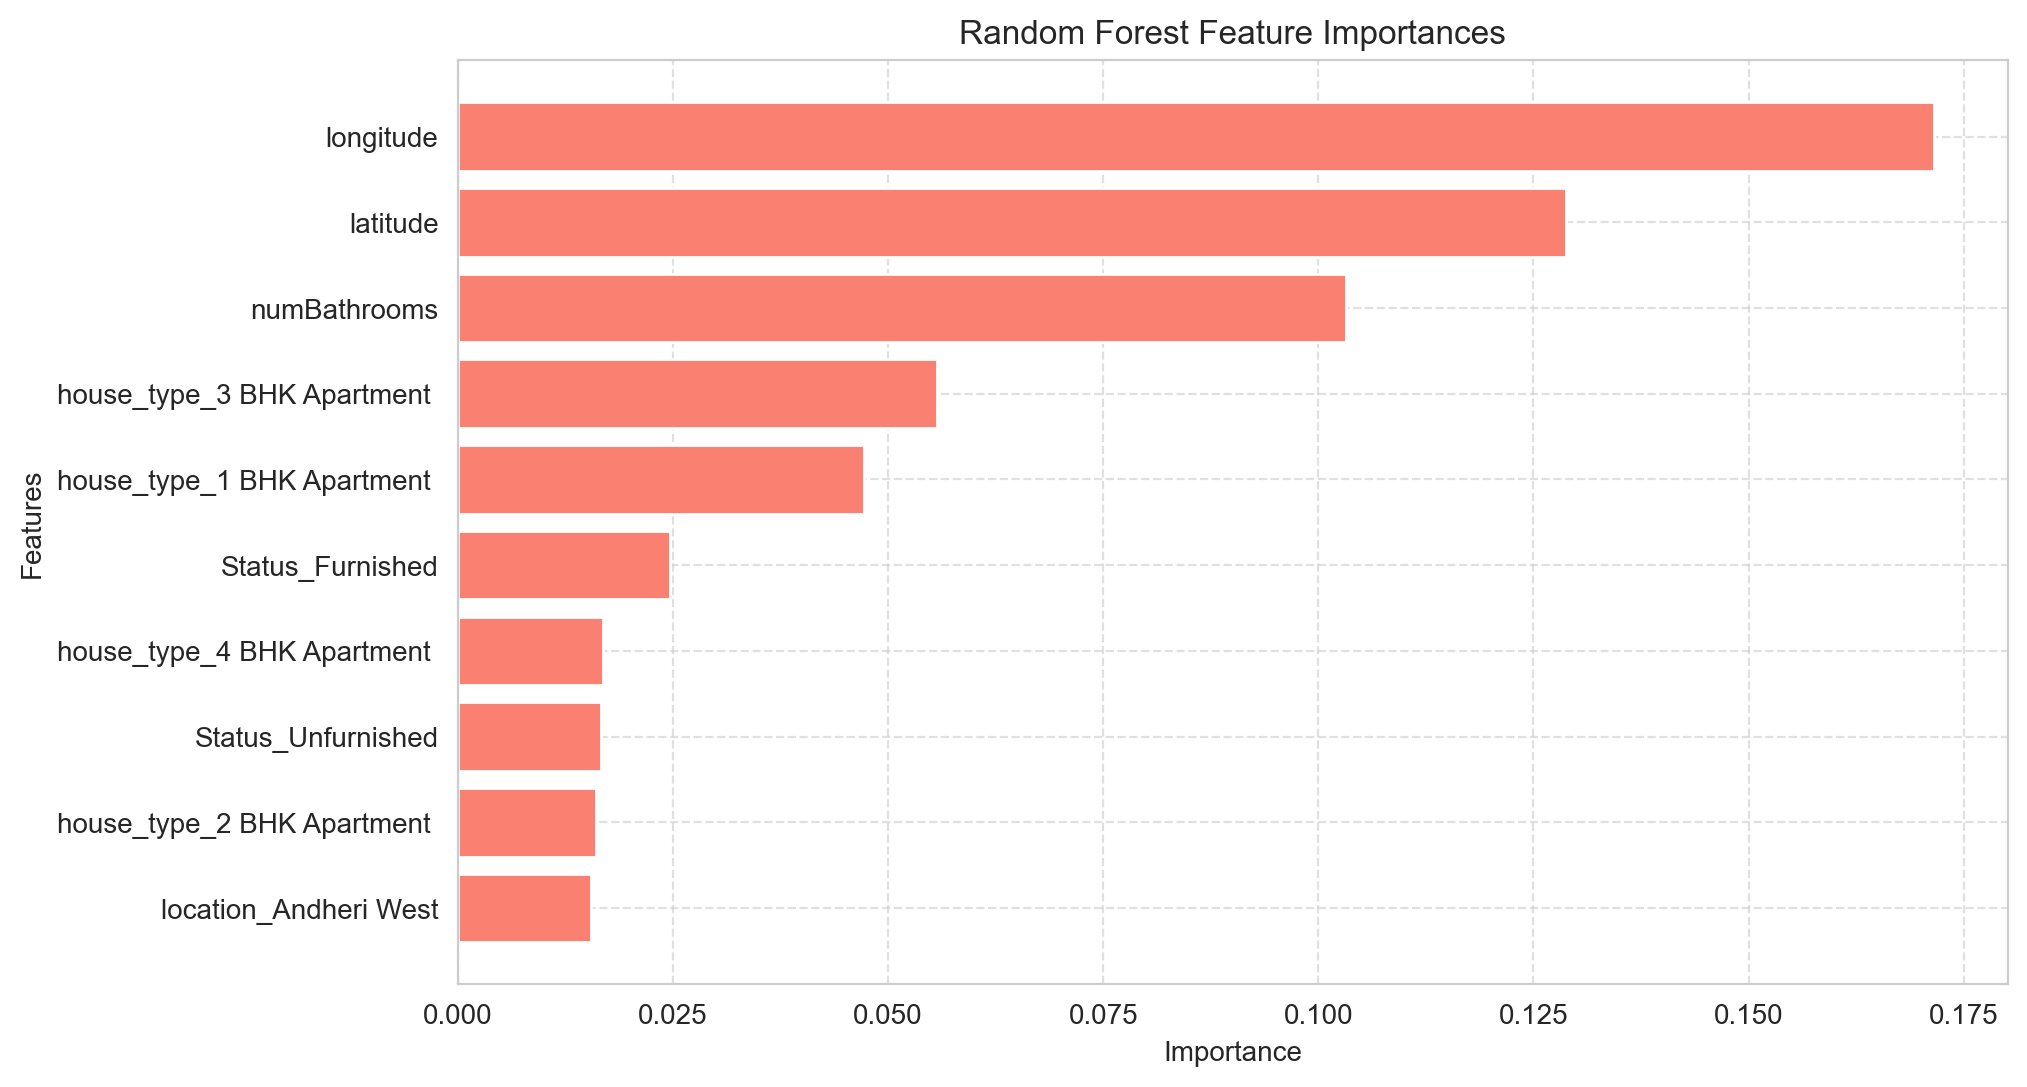

In [57]:
import matplotlib.pyplot as plt

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(best, model, color='salmon')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
## Train - Test Split of Data

In [63]:
# Converting it into numpy array so it Sckit-Learn functions can be used
mumbai3 = mumbai2.values
target = target.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [64]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
mumtrain, mumtest, tartrain, tartest = train_test_split(
    mumbai3, target, 
    test_size=0.3, 
    random_state=999, 
    stratify=target
)

print(mumtrain.shape)
print(mumtest.shape)

(3500, 914)
(1500, 914)


## Model Evaluation Strategy